In [67]:
## Project Video Snap, Pause and Play

In [ ]:
Expectation of the project:
    

In [2]:
# import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Counting the number of frames 

cap = cv2.VideoCapture("WalkingThroughTreesatSunsetVidevo.mov")

property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
total_frame = int(cv2.VideoCapture.get(cap, property_id))
print('total_frame : ', total_frame)

total_frame :  381


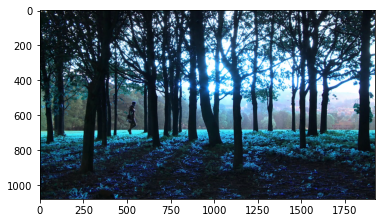

In [4]:
# seeing the frame selected 

frame_selected = 100
cap.set(1,frame_selected);
ret, frame = cap.read()
plt.imshow(frame)

In [5]:
# saving the frame selected

cv2.imwrite('WalkingThroughTreesatSunsetVidevo.jpg', frame)

True

In [6]:
# asking the user to select the coorinates by drawing a rectangle

font = cv2.FONT_HERSHEY_SIMPLEX
points = []

def callback_click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y), 3, (255,0,0), -1)    
        points.append((x,y)) # getting the points which are clicked 
        if len(points) >= 2:
            cv2.line(img, points[-1], points[-2], (255,100,0), 1) 
        cv2.imshow('IMAGE', img)
        if len(points) == 5:
            cv2.destroyAllWindows()
# drawing our own black image        
img = cv2.imread('WalkingThroughTreesatSunsetVidevo.jpg', 1)
cv2.putText(img, 'Select 4 points on an image to crop', (100,150),font, 2 ,(255, 255, 255), 3)
cv2.imshow('IMAGE', img)

# put the above function created here
cv2.setMouseCallback('IMAGE', callback_click_event) # parameters: window name, call back fucntion name

# closing the image
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
points = points[:4]
print(points)

[(495, 505), (478, 727), (549, 723), (566, 516)]


Original Image


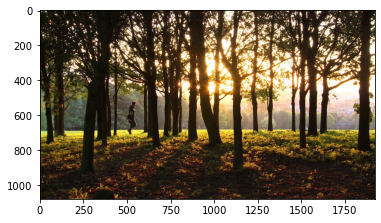

Rectangular selection that user has selected


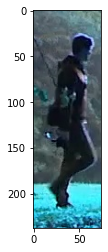

In [8]:
# Original Image

print('Original Image')
img = cv2.imread('WalkingThroughTreesatSunsetVidevo.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


# Rectangular selection that user has selected
print('Rectangular selection that user has selected')

img_2 = img[points[0][1]-10:points[2][1]+10,points[0][0]-10:points[2][0]+10]
img_2 = cv2.cvtColor(img_2, cv2.COLOR_RGB2BGR)
cv2.imwrite('Cropped Image.png', img_2)
plt.imshow(img_2)
plt.show()

In [12]:
# load the overlay image. size should be smaller than video frame size
img = cv2.imread(r'Cropped Image.png')

# Start Capture
cap = cv2.VideoCapture("WalkingThroughTreesatSunsetVidevo.mov")
frame_count = 0
time.sleep(5)
while(cap.isOpened()):
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # add image to frame
        if frame_count > frame_selected:
            frame[points[0][1]-10:points[2][1]+10,points[0][0]-10:points[2][0]+10] = img

        # Display the resulting frame
        cv2.imshow('frame',frame)

        # Exit if ESC key is pressed
        if cv2.waitKey(20) & 0xFF == 27:
            break
        frame_count = frame_count + 1
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
# load the overlay image. size should be smaller than video frame size
img = cv2.imread(r'Cropped Image.png')

# Start Capture
cap = cv2.VideoCapture("WalkingThroughTreesatSunsetVidevo.mov")
frame_count = 0

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # add image to frame
    if frame_count < frame_selected:
        frame[points[0][1]-10:points[2][1]+10,points[0][0]-10:points[2][0]+10] = img

    # Display the resulting frame
    cv2.imshow('frame',frame)

    # Exit if ESC key is pressed
    if cv2.waitKey(20) & 0xFF == 27:
        break
    frame_count = frame_count + 1
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()